In [1]:
import pandas as pd

# 读取数据集
loan_data = pd.read_csv('archive/loan_data.csv')

# 检查数据的基本信息
print(loan_data.info())

# 查看前几行数据
print(loan_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
None
   credit.policy             purpose  int.rate  installmen

数据集列和定义：

credit.policy：如果客户满足 LendingClub.com 的信用承销标准，则为 1，否则为 0。

purpose：贷款的用途（取值 “credit_card”、“debt_consolidation”、“educational”、“major_purchase”、“small_business” 和 “all_other”）。

int.rate：贷款的利率，以比例表示（11% 的利率将存储为 0.11）。被 LendingClub.com 判断为风险更高的借款人被分配更高的利率。

installment：如果贷款有资金，则借款人每月欠下的分期付款。

log.annual.inc：借款人自我报告的年收入的自然对数。

dti：借款人的债务收入比（债务金额除以年收入）。

fico：借款人的 FICO 信用评分。

days.with.cr.line：借款人拥有信用额度的天数。

revol.bal：借款人的循环余额（信用卡账单周期结束时未支付的金额）。

revol.util：借款人的循环额度利用率（已使用的信用额度相对于可用信用总额的金额）。

inq.last.6mths： 借款人在过去 6 个月内被债权人查询的次数。

delinq.2yrs：借款人在过去 2 年中逾期 30+ 天的还款次数。

not.full.paid:借款人是否会得到全额付款。
    
pub.rec：借款人的贬损性公共记录（破产申请、税收留置权或判决）的数量。

In [ ]:
# 先卸载NumPy和相关依赖
!pip uninstall numpy matplotlib pandas

# 然后重新安装
!pip install numpy matplotlib pandas


🔍 前3行数据示例:


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0



🧹 清洗后数据维度: (9578, 14)

✨ 新增特征示例:


,credit_utilization,income_to_installment,fico_dti_interaction
0,3.179439,9.366199,14356.76
1,12.277262,23.734408,10103.03
2,0.797534,7.268895,7931.66


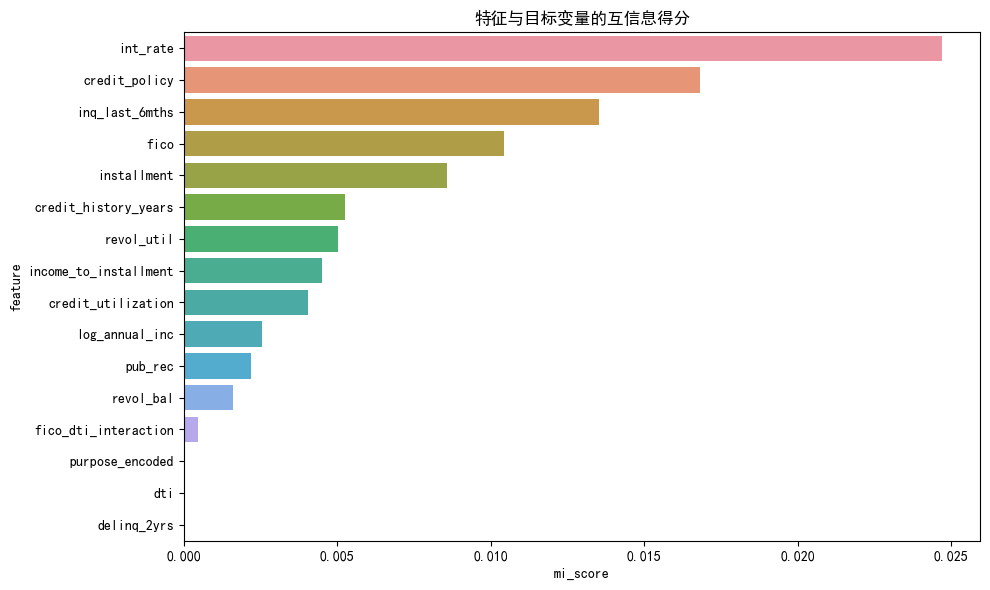


📊 训练集形状: (6704, 16), 测试集形状: (2874, 16)
标准化后训练集统计:


,credit_policy,purpose_encoded,int_rate,installment,log_annual_inc,dti,fico,credit_history_years,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,credit_utilization,income_to_installment,fico_dti_interaction
count,6704.00,6704.00,6704.00,6704.00,6704.00,6704.00,6704.00,6704.00,6704.00,6704.00,6704.00,6704.00,6704.00,6704.00,6704.00,6704.00
mean,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.03,-1.14,-1.78,-1.28,-1.91,-1.68,-1.50,-1.45,-0.91,-1.59,-0.90,-0.37,-0.26,-0.68,-1.02,-1.71
25%,0.49,-0.56,-0.73,-0.78,-0.68,-0.81,-0.80,-0.75,-0.71,-0.85,-0.90,-0.37,-0.26,-0.51,-0.61,-0.80
50%,0.49,0.03,-0.00,-0.24,-0.00,0.00,-0.10,-0.17,-0.35,-0.01,-0.26,-0.37,-0.26,-0.30,-0.32,0.01
75%,0.49,0.03,0.75,0.63,0.70,0.82,0.73,0.59,0.30,0.85,0.39,-0.37,-0.26,0.10,0.21,0.82
max,0.49,2.38,1.78,2.24,1.85,1.66,1.99,2.20,2.87,1.64,2.31,2.73,3.92,10.26,8.65,2.06


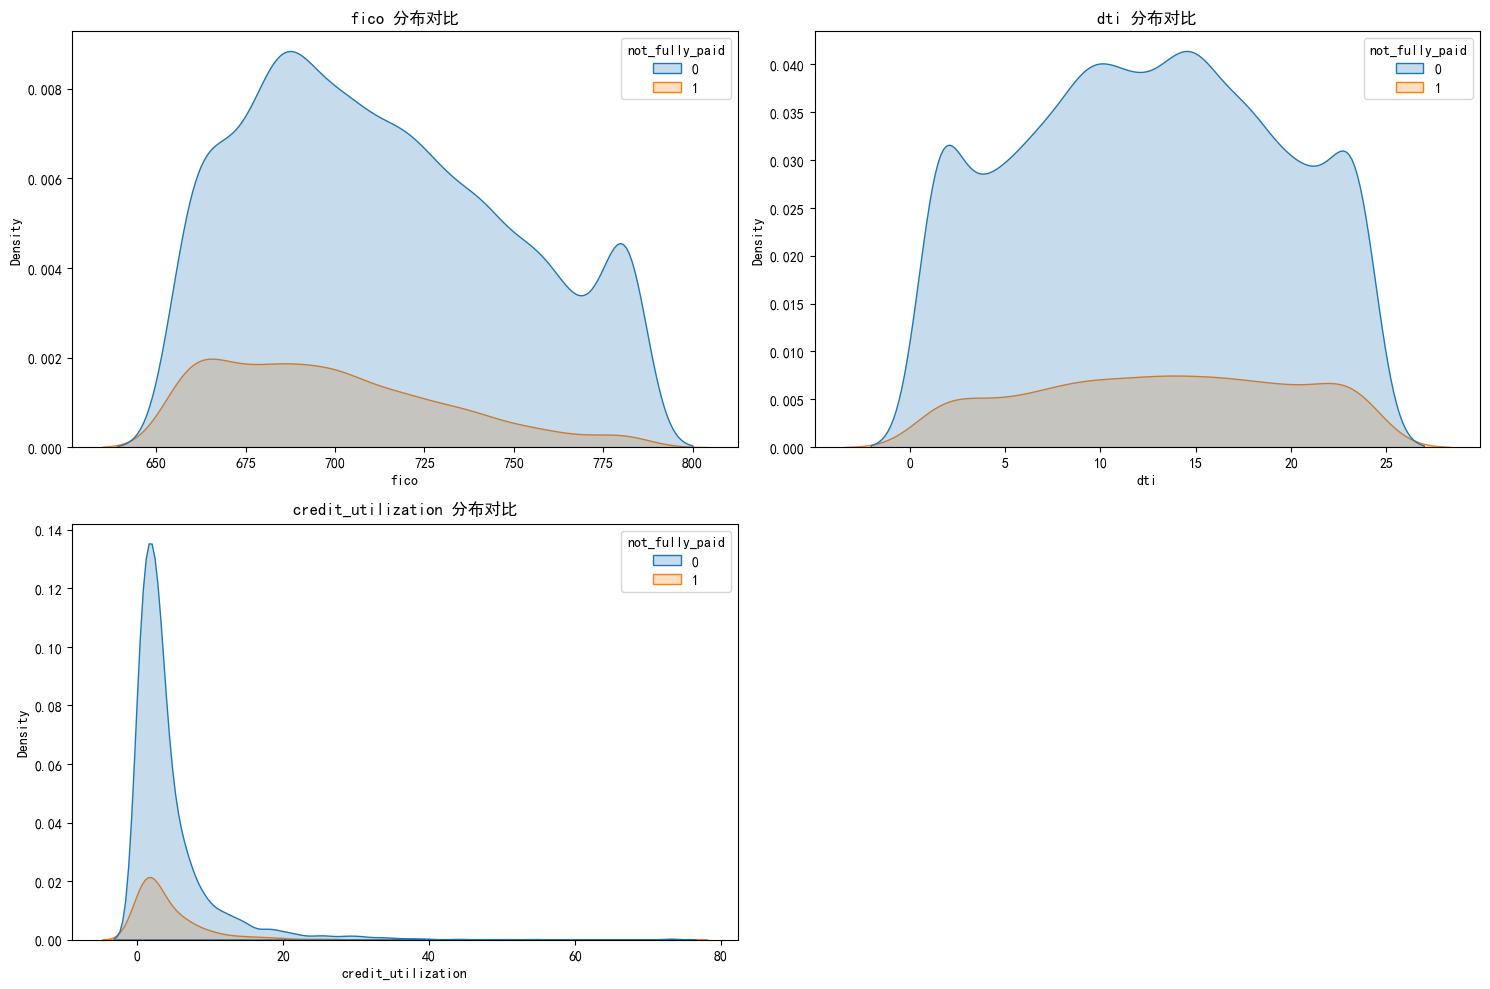

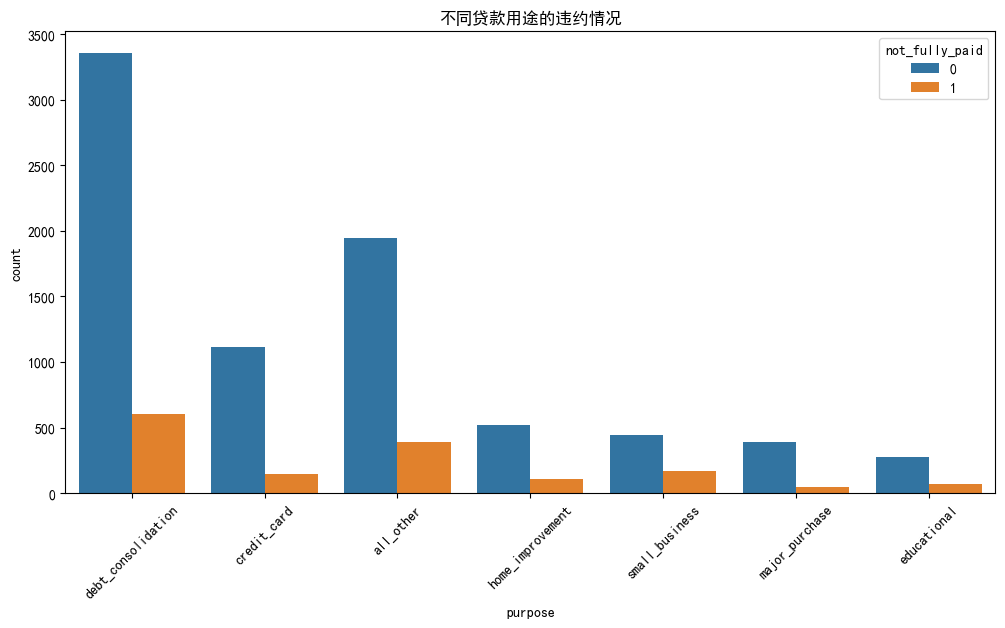


💾 预处理结果已保存为 preprocessed_loan_data.joblib

🎉 预处理完成！最终数据结构:
训练集: (6704, 16), 测试集: (2874, 16)
特征数: 16


In [2]:

"""
个人信用风险评估数据预处理完整流程
包含：数据清洗、特征工程、标准化、可视化验证
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
import warnings
warnings.filterwarnings('ignore')
# 设置中文显示（解决中文乱码问题）
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows系统使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
# 读取数据
loan_data = pd.read_csv('archive/loan_data.csv')

# 数据快照
print("\n🔍 前3行数据示例:")
display(loan_data.head(3))

# ======================
# 2. 数据清洗
# ======================
def clean_data(df):
    """数据清洗主函数"""
    # 2.1 处理缺失值（虽然原始数据无缺失，但作为安全措施）
    df_clean = df.dropna().copy()
    
    # 2.2 处理异常值
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    for col in numeric_cols:
        q1 = df[col].quantile(0.05)  # 使用5%分位数替代1%避免过度修剪
        q3 = df[col].quantile(0.95)
        df_clean[col] = df[col].clip(lower=q1, upper=q3)
    
    # 2.3 修正列名格式
    df_clean.columns = [col.replace('.', '_') for col in df_clean.columns]
    
    return df_clean

loan_data = clean_data(loan_data)
print("\n🧹 清洗后数据维度:", loan_data.shape)

# ======================
# 3. 特征工程
# ======================
def feature_engineering(df):
    """特征工程处理"""
    # 3.1 编码类别变量
    le = LabelEncoder()
    df['purpose_encoded'] = le.fit_transform(df['purpose'])
    
    # 3.2 创建衍生特征
    df['credit_utilization'] = df['revol_bal'] / (df['installment'] * 12 + 1e-6)  # 防止除零
    df['income_to_installment'] = np.exp(df['log_annual_inc']) / (df['installment'] * 12 + 1e-6)
    df['credit_history_years'] = df['days_with_cr_line'] / 365
    
    # 3.3 交互特征
    df['fico_dti_interaction'] = df['fico'] * df['dti']
    
    return df, le

loan_data, label_encoder = feature_engineering(loan_data)

# 显示新增特征
print("\n✨ 新增特征示例:")
display(loan_data[['credit_utilization', 'income_to_installment', 'fico_dti_interaction']].head(3))

# ======================
# 4. 特征选择
# ======================
# 定义最终特征集
selected_features = [
    'credit_policy', 'purpose_encoded', 'int_rate', 'installment',
    'log_annual_inc', 'dti', 'fico', 'credit_history_years', 'revol_bal',
    'revol_util', 'inq_last_6mths', 'delinq_2yrs', 'pub_rec',
    'credit_utilization', 'income_to_installment', 'fico_dti_interaction'
]

target = 'not_fully_paid'

# 特征重要性预分析
mi_scores = mutual_info_classif(loan_data[selected_features], loan_data[target])
mi_df = pd.DataFrame({'feature': selected_features, 'mi_score': mi_scores}) \
       .sort_values('mi_score', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='mi_score', y='feature', data=mi_df)
plt.title('特征与目标变量的互信息得分')
plt.tight_layout()
plt.show()

# ======================
# 5. 数据标准化与分割
# ======================
# 5.1 划分训练测试集
X_train, X_test, y_train, y_test = train_test_split(
    loan_data[selected_features], 
    loan_data[target],
    test_size=0.3, 
    random_state=42,
    stratify=loan_data[target]  # 保持类别比例
)

# 5.2 标准化处理（保留原始数据副本）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 转换为DataFrame保持列名
X_train_df = pd.DataFrame(X_train_scaled, columns=selected_features)
X_test_df = pd.DataFrame(X_test_scaled, columns=selected_features)

print(f"\n📊 训练集形状: {X_train_df.shape}, 测试集形状: {X_test_df.shape}")
print("标准化后训练集统计:")
display(X_train_df.describe().round(2))

# ======================
# 7. 预处理结果可视化
# ======================
# 7.1 数值特征分布对比
plt.figure(figsize=(15,10))
for i, col in enumerate(['fico', 'dti', 'credit_utilization'], 1):
    plt.subplot(2,2,i)
    sns.kdeplot(data=loan_data, x=col, hue='not_fully_paid', fill=True)
    plt.title(f'{col} 分布对比')
plt.tight_layout()
plt.show()

# 7.2 类别特征分析
plt.figure(figsize=(12,6))
sns.countplot(data=loan_data, x='purpose', hue='not_fully_paid')
plt.title('不同贷款用途的违约情况')
plt.xticks(rotation=45)
plt.show()

# ======================
# 8. 保存预处理结果
# ======================
preprocessed_data = {
    'X_train': X_train_df,
    'y_train': y_train,
    'X_test': X_test_df,
    'y_test': y_test,
    'scaler': scaler,
    'label_encoder': label_encoder,
    'selected_features': selected_features
}

import joblib
joblib.dump(preprocessed_data, 'preprocessed_loan_data.joblib')
print("\n💾 预处理结果已保存为 preprocessed_loan_data.joblib")

# 最终数据结构确认
print("\n🎉 预处理完成！最终数据结构:")
print(f"训练集: {X_train_df.shape}, 测试集: {X_test_df.shape}")
print(f"特征数: {len(selected_features)}")

✅ 数据加载成功，原始维度: (9578, 14)

🔍 前3行数据示例:


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0



🧹 清洗后数据维度: (9578, 14)

✨ 新增特征示例:


,credit_utilization,income_to_installment,fico_dti_interaction
0,3.179439,9.366199,14356.76
1,12.277262,23.734408,10103.03
2,0.797534,7.268895,7931.66


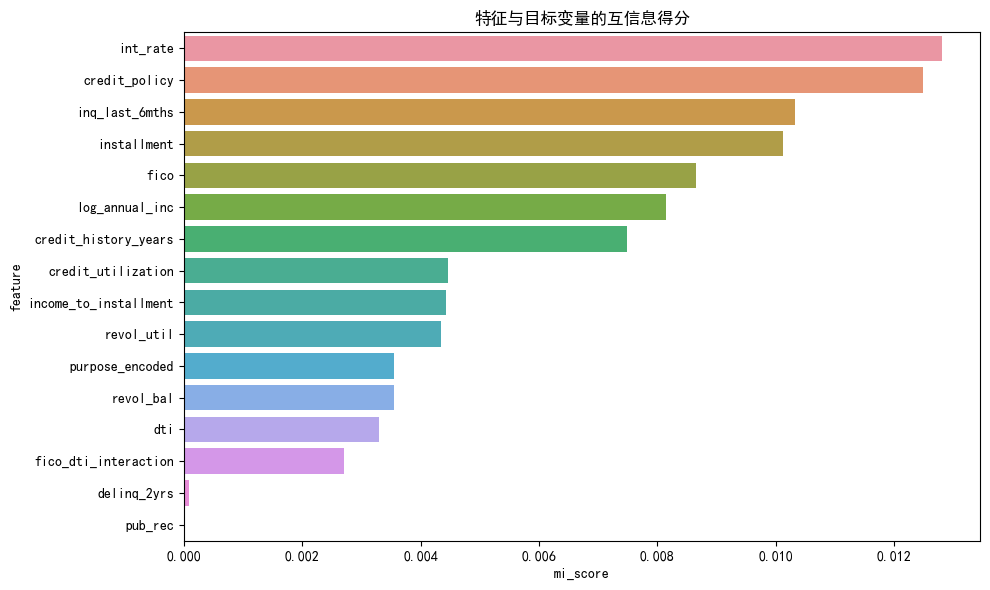


📊 训练集形状: (6704, 16), 测试集形状: (2874, 16)
标准化后训练集统计:


,credit_policy,purpose_encoded,int_rate,installment,log_annual_inc,dti,fico,credit_history_years,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,credit_utilization,income_to_installment,fico_dti_interaction
count,6704.00,6704.00,6704.00,6704.00,6704.00,6704.00,6704.00,6704.00,6704.00,6704.00,6704.00,6704.00,6704.00,6704.00,6704.00,6704.00
mean,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.03,-1.14,-1.78,-1.28,-1.91,-1.68,-1.50,-1.45,-0.91,-1.59,-0.90,-0.37,-0.26,-0.68,-1.02,-1.71
25%,0.49,-0.56,-0.73,-0.78,-0.68,-0.81,-0.80,-0.75,-0.71,-0.85,-0.90,-0.37,-0.26,-0.51,-0.61,-0.80
50%,0.49,0.03,-0.00,-0.24,-0.00,0.00,-0.10,-0.17,-0.35,-0.01,-0.26,-0.37,-0.26,-0.30,-0.32,0.01
75%,0.49,0.03,0.75,0.63,0.70,0.82,0.73,0.59,0.30,0.85,0.39,-0.37,-0.26,0.10,0.21,0.82
max,0.49,2.38,1.78,2.24,1.85,1.66,1.99,2.20,2.87,1.64,2.31,2.73,3.92,10.26,8.65,2.06



⚖️ 原始类别分布:
not_fully_paid
0    0.839946
1    0.160054
Name: proportion, dtype: float64

🔄 过采样后类别分布:
not_fully_paid
0    0.5
1    0.5
Name: proportion, dtype: float64


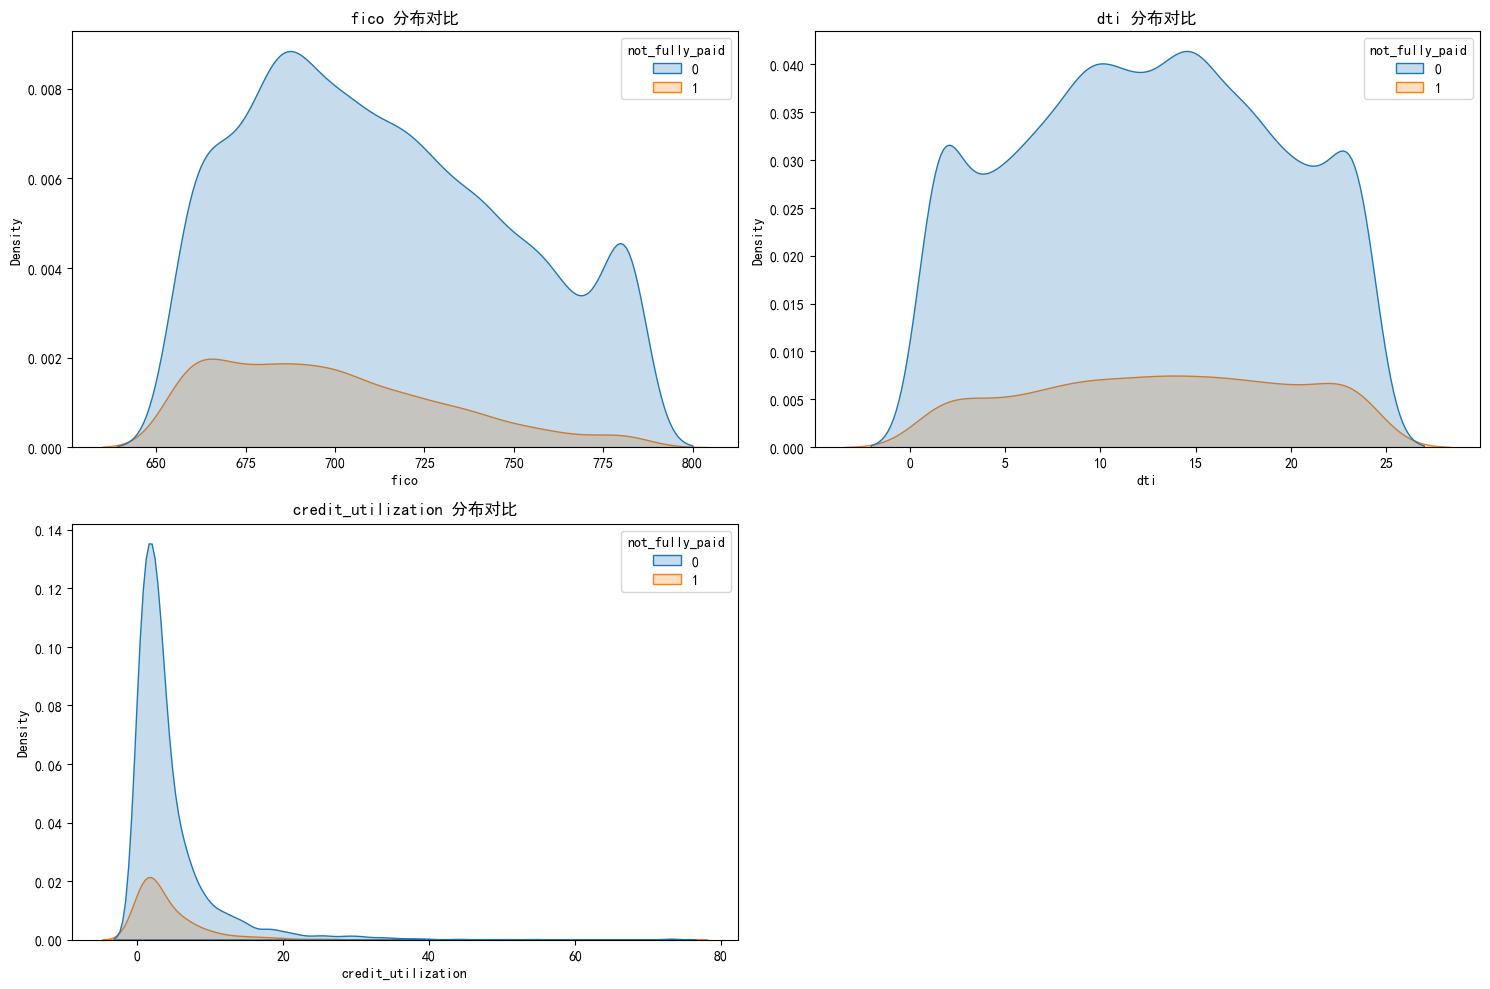

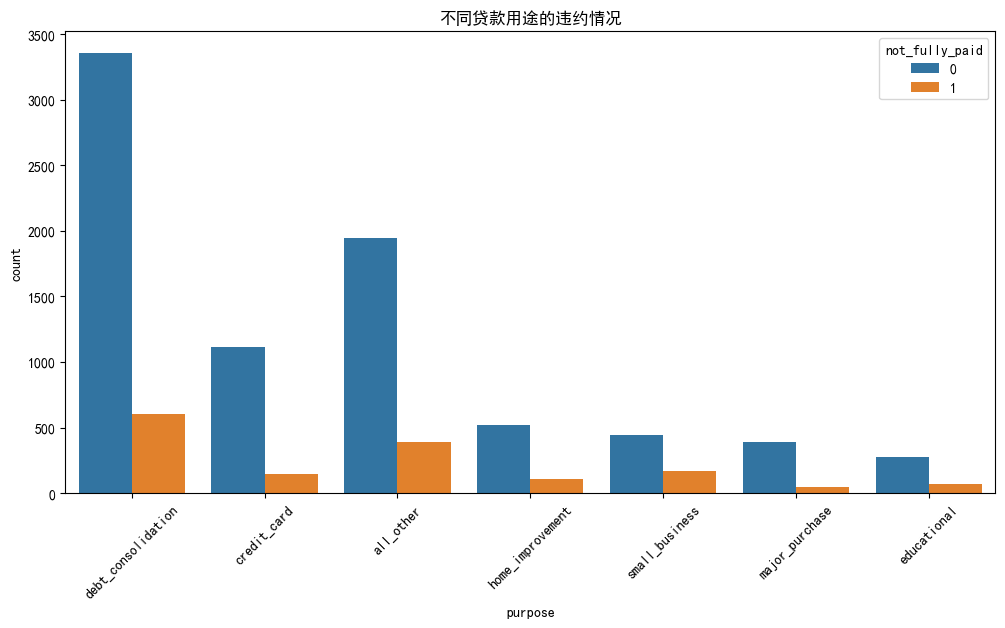


💾 预处理结果已保存为 preprocessed_loan_data.joblib

🎉 预处理完成！最终数据结构:
训练集: (11262, 16), 测试集: (2874, 16)
特征数: 16


In [3]:
# -*- coding: utf-8 -*-
"""
个人信用风险评估数据预处理完整流程
包含：数据清洗、特征工程、标准化、样本平衡、可视化验证
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import mutual_info_classif
import warnings
warnings.filterwarnings('ignore')

# ======================
# 1. 数据加载与初步检查
# ======================
def load_data(filepath):
    """安全加载数据函数"""
    try:
        df = pd.read_csv(filepath)
        print(f"✅ 数据加载成功，原始维度: {df.shape}")
        return df
    except Exception as e:
        print(f"❌ 加载失败: {str(e)}")
        return None

loan_data = load_data('archive/loan_data.csv')

# 数据快照
print("\n🔍 前3行数据示例:")
display(loan_data.head(3))

# ======================
# 2. 数据清洗
# ======================
def clean_data(df):
    """数据清洗主函数"""
    # 2.1 处理缺失值（虽然原始数据无缺失，但作为安全措施）
    df_clean = df.dropna().copy()
    
    # 2.2 处理异常值
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    for col in numeric_cols:
        q1 = df[col].quantile(0.05)  # 使用5%分位数替代1%避免过度修剪
        q3 = df[col].quantile(0.95)
        df_clean[col] = df[col].clip(lower=q1, upper=q3)
    
    # 2.3 修正列名格式
    df_clean.columns = [col.replace('.', '_') for col in df_clean.columns]
    
    return df_clean

loan_data = clean_data(loan_data)
print("\n🧹 清洗后数据维度:", loan_data.shape)

# ======================
# 3. 特征工程
# ======================
def feature_engineering(df):
    """特征工程处理"""
    # 3.1 编码类别变量
    le = LabelEncoder()
    df['purpose_encoded'] = le.fit_transform(df['purpose'])
    
    # 3.2 创建衍生特征
    df['credit_utilization'] = df['revol_bal'] / (df['installment'] * 12 + 1e-6)  # 防止除零
    df['income_to_installment'] = np.exp(df['log_annual_inc']) / (df['installment'] * 12 + 1e-6)
    df['credit_history_years'] = df['days_with_cr_line'] / 365
    
    # 3.3 交互特征
    df['fico_dti_interaction'] = df['fico'] * df['dti']
    
    return df, le

loan_data, label_encoder = feature_engineering(loan_data)

# 显示新增特征
print("\n✨ 新增特征示例:")
display(loan_data[['credit_utilization', 'income_to_installment', 'fico_dti_interaction']].head(3))

# ======================
# 4. 特征选择
# ======================
# 定义最终特征集
selected_features = [
    'credit_policy', 'purpose_encoded', 'int_rate', 'installment',
    'log_annual_inc', 'dti', 'fico', 'credit_history_years', 'revol_bal',
    'revol_util', 'inq_last_6mths', 'delinq_2yrs', 'pub_rec',
    'credit_utilization', 'income_to_installment', 'fico_dti_interaction'
]

target = 'not_fully_paid'

# 特征重要性预分析
mi_scores = mutual_info_classif(loan_data[selected_features], loan_data[target])
mi_df = pd.DataFrame({'feature': selected_features, 'mi_score': mi_scores}) \
       .sort_values('mi_score', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='mi_score', y='feature', data=mi_df)
plt.title('特征与目标变量的互信息得分')
plt.tight_layout()
plt.show()

# ======================
# 5. 数据标准化与分割
# ======================
# 5.1 划分训练测试集
X_train, X_test, y_train, y_test = train_test_split(
    loan_data[selected_features], 
    loan_data[target],
    test_size=0.3, 
    random_state=42,
    stratify=loan_data[target]  # 保持类别比例
)

# 5.2 标准化处理（保留原始数据副本）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 转换为DataFrame保持列名
X_train_df = pd.DataFrame(X_train_scaled, columns=selected_features)
X_test_df = pd.DataFrame(X_test_scaled, columns=selected_features)

print(f"\n📊 训练集形状: {X_train_df.shape}, 测试集形状: {X_test_df.shape}")
print("标准化后训练集统计:")
display(X_train_df.describe().round(2))

# ======================
# 6. 处理样本不平衡
# ======================
# 6.1 检查原始分布
print("\n⚖️ 原始类别分布:")
print(y_train.value_counts(normalize=True))

# 6.2 SMOTE过采样
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_df, y_train)

# 6.3 验证平衡效果
print("\n🔄 过采样后类别分布:")
print(pd.Series(y_resampled).value_counts(normalize=True))

# ======================
# 7. 预处理结果可视化
# ======================
# 7.1 数值特征分布对比
plt.figure(figsize=(15,10))
for i, col in enumerate(['fico', 'dti', 'credit_utilization'], 1):
    plt.subplot(2,2,i)
    sns.kdeplot(data=loan_data, x=col, hue='not_fully_paid', fill=True)
    plt.title(f'{col} 分布对比')
plt.tight_layout()
plt.show()

# 7.2 类别特征分析
plt.figure(figsize=(12,6))
sns.countplot(data=loan_data, x='purpose', hue='not_fully_paid')
plt.title('不同贷款用途的违约情况')
plt.xticks(rotation=45)
plt.show()

# ======================
# 8. 保存预处理结果
# ======================
preprocessed_data = {
    'X_train': X_resampled,
    'y_train': y_resampled,
    'X_test': X_test_df,
    'y_test': y_test,
    'scaler': scaler,
    'label_encoder': label_encoder,
    'selected_features': selected_features
}

import joblib
joblib.dump(preprocessed_data, 'preprocessed_loan_data.joblib')
print("\n💾 预处理结果已保存为 preprocessed_loan_data.joblib")

# 最终数据结构确认
print("\n🎉 预处理完成！最终数据结构:")
print(f"训练集: {X_resampled.shape}, 测试集: {X_test_df.shape}")
print(f"特征数: {len(selected_features)}")

✅ 成功加载预处理数据

=== 逻辑回归 模型评估 ===
分类报告:
               precision    recall  f1-score   support

           0       0.88      0.61      0.72      2414
           1       0.22      0.58      0.32       460

    accuracy                           0.61      2874
   macro avg       0.55      0.59      0.52      2874
weighted avg       0.78      0.61      0.66      2874

AUC值: 0.6553483303915565

=== 随机森林 模型评估 ===
分类报告:
               precision    recall  f1-score   support

           0       0.85      0.92      0.89      2414
           1       0.28      0.15      0.20       460

    accuracy                           0.80      2874
   macro avg       0.56      0.54      0.54      2874
weighted avg       0.76      0.80      0.78      2874

AUC值: 0.6545671085335544

=== 梯度提升树 模型评估 ===
分类报告:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      2414
           1       0.31      0.18      0.23       460

    accuracy                           0.

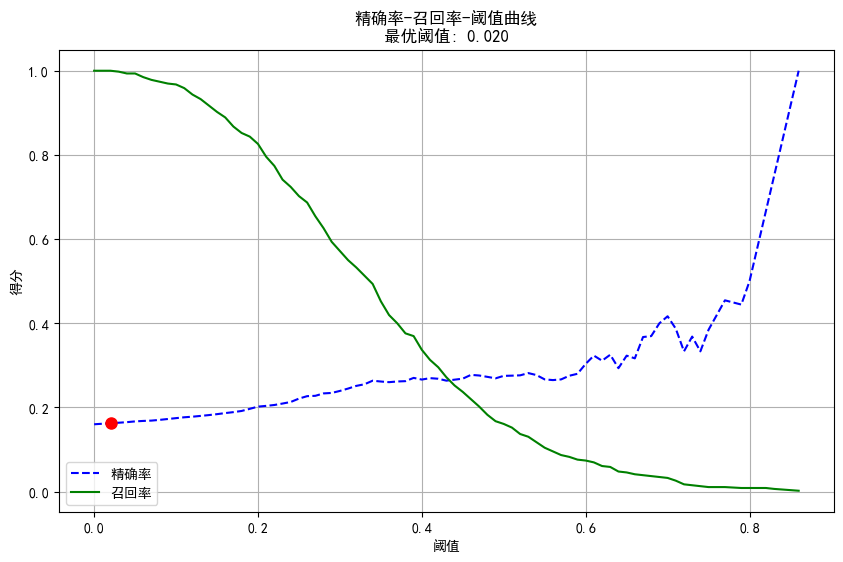


📊 阈值优化后分类结果:
              precision    recall  f1-score   support

           0       1.00      0.02      0.04      2414
           1       0.16      1.00      0.28       460

    accuracy                           0.18      2874
   macro avg       0.58      0.51      0.16      2874
weighted avg       0.87      0.18      0.08      2874



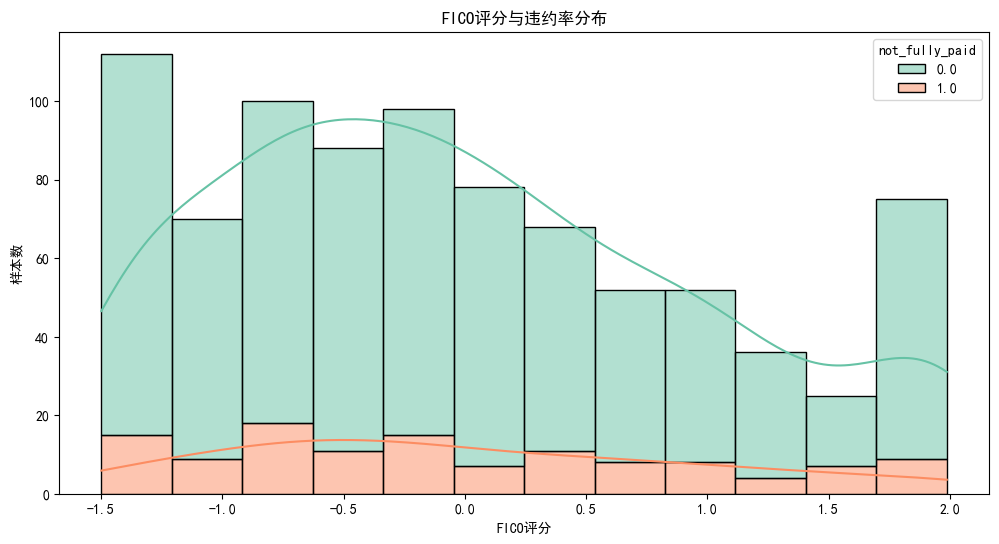

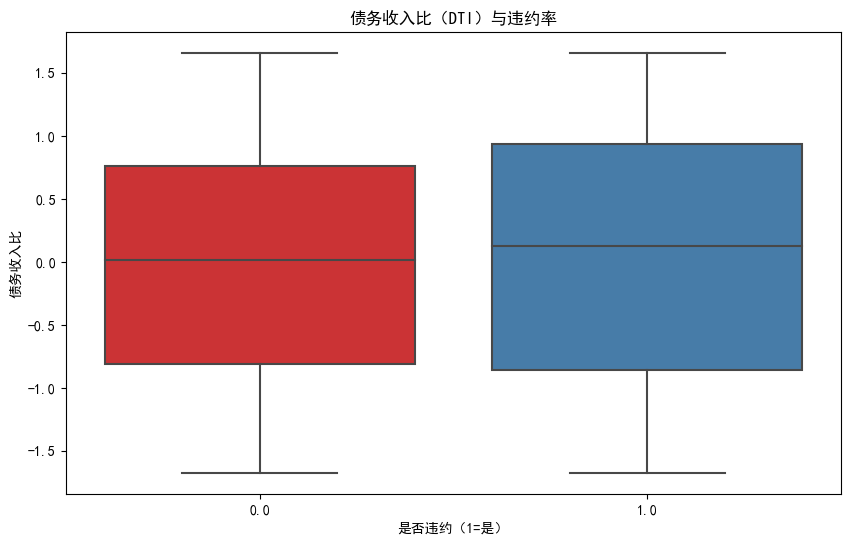

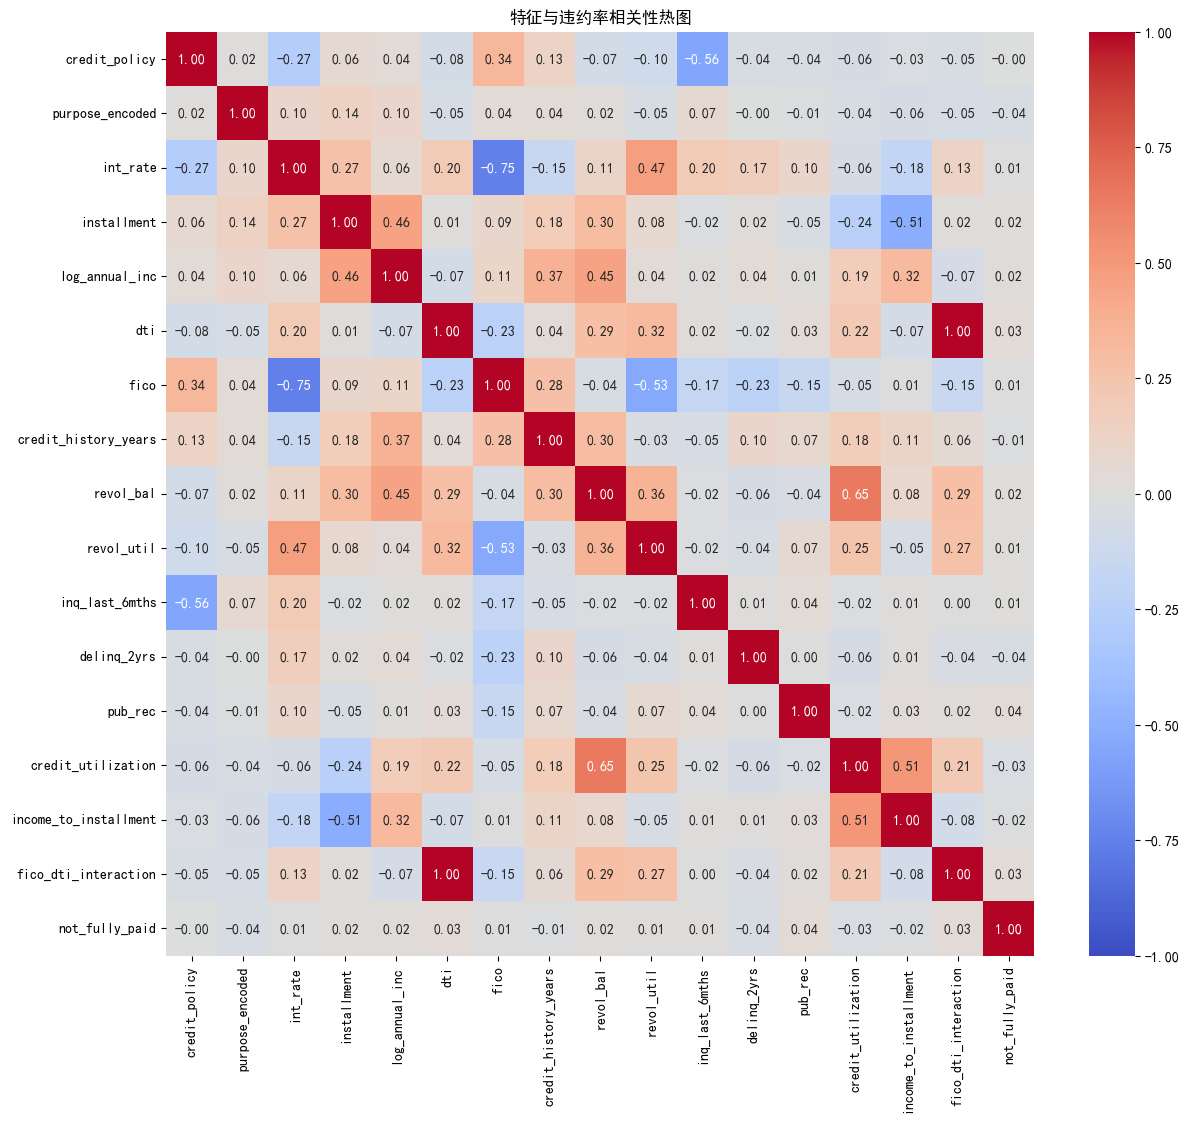


🚨 高风险客户特征统计:
             fico         dti  credit_utilization
count  122.000000  122.000000          122.000000
mean     0.005457    0.071113           -0.076554
std      0.972861    1.049513            0.713181
min     -1.499114   -1.679359           -0.676943
25%     -0.662225   -0.859188           -0.508503
50%     -0.104299    0.125017           -0.252101
75%      0.697720    0.937731            0.117939
max      1.987924    1.657990            4.153499

💾 随机森林模型已保存为 credit_risk_rf_model.pkl
📄 模型性能报告已保存为 model_performance_report.txt


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    roc_auc_score, 
    roc_curve, 
    precision_recall_curve,
    plot_confusion_matrix
)
import joblib
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 加载预处理数据（包含SMOTE过采样后的训练集）
try:
    data = joblib.load('preprocessed_loan_data.joblib')
    print("✅ 成功加载预处理数据")
except FileNotFoundError:
    print("❌ 请先运行数据预处理脚本生成 preprocessed_loan_data.joblib")
    exit()

# 提取数据
X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']
y_test = data['y_test']
scaler = data['scaler']
selected_features = data['selected_features']


### ======================
### 一、个人贷款违约预测模型构建
### ======================
def build_classification_models(X_train, y_train, X_test, y_test):
    """构建并评估分类模型"""
    models = {
        '逻辑回归': LogisticRegression(max_iter=1000, random_state=42),
        '随机森林': RandomForestClassifier(n_estimators=100, random_state=42),
        '梯度提升树': GradientBoostingClassifier(n_estimators=100, random_state=42)
    }
    
    results = {}
    
    for name, model in models.items():
        # 模型训练
        model.fit(X_train, y_train)
        
        # 模型评估
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
        
        # 保存结果
        results[name] = {
            'model': model,
            'classification_report': classification_report(y_test, y_pred),
            'roc_auc': roc_auc_score(y_test, y_prob),
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }
        
        # 打印结果
        print(f"\n=== {name} 模型评估 ===")
        print("分类报告:\n", results[name]['classification_report'])
        print("AUC值:", results[name]['roc_auc'])
    
    return results

# 训练并评估模型
model_results = build_classification_models(X_train, y_train, X_test, y_test)


### ======================
### 二、信用卡欺诈检测系统开发（阈值优化）
### ======================
def optimize_threshold(y_true, y_prob):
    """基于精确率-召回率曲线优化阈值"""
    precision, recall, thresholds = precision_recall_curve(y_true, y_prob)
    j_index = np.argmax(precision + recall)  # 约登指数最大点
    best_threshold = thresholds[j_index]
    
    # 可视化
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, precision[:-1], 'b--', label='精确率')
    plt.plot(thresholds, recall[:-1], 'g-', label='召回率')
    plt.plot(best_threshold, precision[j_index], 'ro', markersize=8)
    plt.xlabel('阈值')
    plt.ylabel('得分')
    plt.title('精确率-召回率-阈值曲线\n最优阈值: {:.3f}'.format(best_threshold))
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return best_threshold

# 以随机森林模型为例进行阈值优化
rf_model = model_results['随机森林']['model']
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
best_threshold = optimize_threshold(y_test, y_prob_rf)

# 应用最优阈值
y_pred_optimized = (y_prob_rf >= best_threshold).astype(int)
print("\n📊 阈值优化后分类结果:")
print(classification_report(y_test, y_pred_optimized))


### ======================
### 三、消费者行为与信用评分关系分析
### ======================
def analyze_consumer_behavior(X_test, y_test, features):
    """消费者行为与信用风险关联分析"""
    # 合并特征与标签
    analysis_df = pd.concat([X_test, y_test], axis=1)
    
    # 1. FICO评分与违约率分布
    plt.figure(figsize=(12, 6))
    sns.histplot(
        analysis_df, 
        x='fico', 
        hue='not_fully_paid', 
        multiple='stack', 
        kde=True,
        palette='Set2'
    )
    plt.title('FICO评分与违约率分布')
    plt.xlabel('FICO评分')
    plt.ylabel('样本数')
    plt.show()
    
    # 2. 债务收入比（DTI）与违约率
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        x='not_fully_paid', 
        y='dti', 
        data=analysis_df,
        palette='Set1'
    )
    plt.title('债务收入比（DTI）与违约率')
    plt.xlabel('是否违约（1=是）')
    plt.ylabel('债务收入比')
    plt.show()
    
    # 3. 特征相关性矩阵
    corr = analysis_df[features + ['not_fully_paid']].corr()
    plt.figure(figsize=(14, 12))
    sns.heatmap(
        corr, 
        annot=True, 
        fmt='.2f', 
        cmap='coolwarm', 
        vmin=-1, 
        vmax=1
    )
    plt.title('特征与违约率相关性热图')
    plt.show()
    
    # 4. 高风险特征组合分析
    high_risk = analysis_df[analysis_df['not_fully_paid'] == 1]
    print("\n🚨 高风险客户特征统计:")
    print(high_risk[['fico', 'dti', 'credit_utilization']].describe())

# 执行消费者行为分析
analyze_consumer_behavior(X_test, y_test, selected_features)


### ======================
### 四、模型持久化与部署准备
### ======================
# 保存最优模型（以随机森林为例）
joblib.dump(model_results['随机森林']['model'], 'credit_risk_rf_model.pkl')
print("\n💾 随机森林模型已保存为 credit_risk_rf_model.pkl")

# 生成模型性能报告
with open('model_performance_report.txt', 'w') as f:
    for name, result in model_results.items():
        f.write(f"=== {name} 模型报告 ===\n")
        f.write("分类报告:\n")
        f.write(result['classification_report'])
        f.write(f"AUC值: {result['roc_auc']}\n\n")

print("📄 模型性能报告已保存为 model_performance_report.txt")